In [59]:
import pandas as pd
import torch
import numpy as np

In [87]:
def loss(pred, true, errors):
    min_, max_ = true - errors, true + errors
    l, indices = torch.max(torch.stack([(min_ - pred), (pred - max_), torch.zeros_like(pred)], dim=1), dim=1)
    return torch.mean(l, dim=0) + torch.mean(pred - true).mean(dim=0) / 10


data = pd.read_csv('data/3.csv')

# Prepare data
X = torch.tensor(data['x'].values, dtype=torch.float32).reshape(-1, 1)
y = torch.tensor(data['y'].values, dtype=torch.float32).reshape(-1, 1)
y_err = torch.tensor(data['y_err'].values, dtype=torch.float32).reshape(-1, 1)

model = torch.nn.Linear(1, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X)
    loss_value = loss(y_pred, y, y_err)
    loss_value.backward()
    optimizer.step()

# Print final parameters
print(f'\nTrained parameters:')
print(f'Weight: {model.weight.item():.4f}')
print(f'Bias: {model.bias.item():.4f}')



Trained parameters:
Weight: 44.9985
Bias: -6.6780


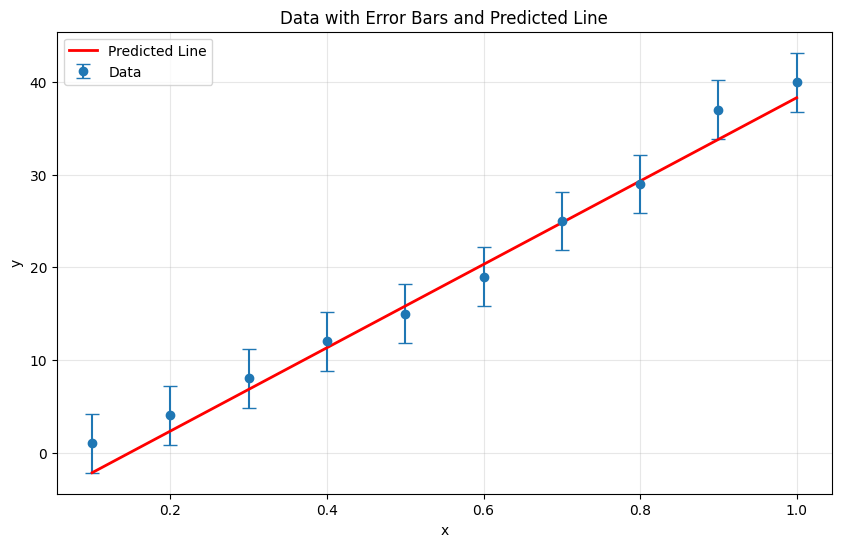

In [88]:
import matplotlib.pyplot as plt

# Plot data points with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(data['x'], data['y'], yerr=data['y_err'], fmt='o', label='Data', capsize=5)

# Plot predicted line
x_line = np.linspace(data['x'].min(), data['x'].max(), 100)
with torch.no_grad():
    y_line = model(torch.tensor(x_line, dtype=torch.float32).reshape(-1, 1)).numpy()

plt.plot(x_line, y_line, 'r-', label='Predicted Line', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Data with Error Bars and Predicted Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
